#1.세팅

1. '런타임' - '런타임 유형 변경'에서 'GPU' - '저장' 선택
2. 오른쪽 상단의 '연결' 누르기

In [ ]:
!nvidia-smi

Sun Jul 10 05:38:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2.데이터셋 준비

In [ ]:
import tensorflow as tf

In [ ]:
# MNIST 데이터셋
mnist = tf.keras.datasets.mnist

In [ ]:
# 여기에서 x는 이미지, y는 숫자 라벨
# 각각에 대해, 트레이닝, 테스트 데이터셋으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## 2.1.샘플 살펴보기

### 1) 개수

In [ ]:
# 트레이닝 이미지 개수
len(x_train)

60000

In [ ]:
# 트레이닝 라벨 개수
len(y_train)

60000

In [ ]:
# 각 숫자의 개수
from collections import Counter
Counter(y_train)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [ ]:
# 테스트 이미지 개수
len(x_test)

10000

In [ ]:
# 테스트 라벨 개수
len(y_test)

10000

In [ ]:
# 각 숫자의 개수
from collections import Counter
Counter(y_test)

Counter({0: 980,
         1: 1135,
         2: 1032,
         3: 1010,
         4: 982,
         5: 892,
         6: 958,
         7: 1028,
         8: 974,
         9: 1009})

* 트레이닝, 테스트 데이터 세트는 각각 60000개, 10000개로 설정합니다.
    * 우리는 60000개의 데이터를 활용해 모델을 만들고, 10000개를 통해 검증합니다.
    * 각 숫자의 개수는 정확히 10%씩인 6000개는 아닙니다. (약간씩 다릅니다.)

### 2) 데이터 형태

#### a. 이미지

In [ ]:
# 이미지 살펴보기
x_train[0].shape

(28, 28)

In [ ]:
# 첫 번째 이미지 살펴보기
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

0 에서 255 사이의 숫자(uint8)로 구성된, 28x28=784개의 숫자가 이미지입니다.

In [ ]:
import matplotlib.pyplot as plt

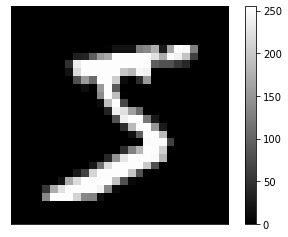

In [ ]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary.reversed())
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

#### b. 라벨

In [ ]:
y_train[0]

5

### 3) 한꺼번에 보기

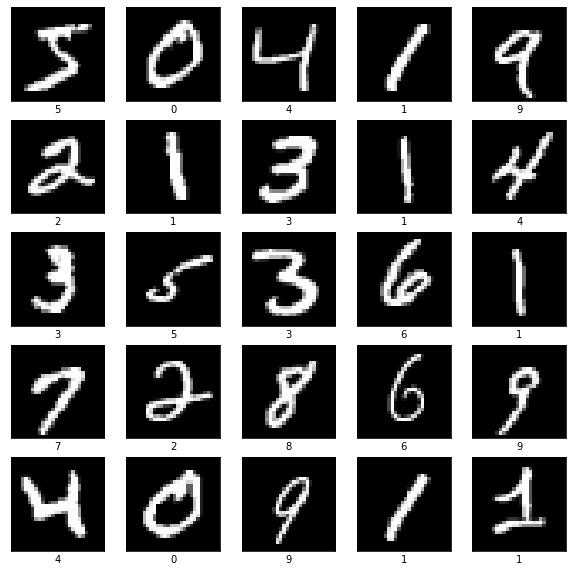

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary.reversed())
    plt.xlabel(y_train[i])
plt.show()

* 데이터는 랜덤으로 섞여있습니다.

## 2.2.알 수 있는 것들 (종합)

* 트레이닝, 테스트 데이터 세트는 각각 60000개, 10000개로 설정합니다.
    * 우리는 60000개의 데이터를 활용해 모델을 만들고, 10000개를 통해 검증합니다.
    * 각 숫자의 개수는 정확히 10%씩인 6000개는 아닙니다. (약간씩 다릅니다.)
* 0 에서 255 사이의 숫자(uint8)로 구성된, 28x28=784개의 숫자가 이미지입니다.
* 데이터는 랜덤으로 섞여있습니다.


* 일반적으로, 트레이닝 | 검증 | 테스트 이렇게 데이터를 나누어 훈련합니다.
    * 사실상, 테스트 데이터는 공개되지 않습니다.
    * 수능을 비유해서 보자면,
        * 트레이닝은 "교과서"라고 생각하고,
        * 검증은 "답을 갖고 있는 수능 모의고사"라고 생각할 수 있으며,
        * 테스트는 "전국 모의고사"라고 생각할 수 있겠지요.
            * 당연히, "전국 모의고사"의 답은 모의고사가 끝난 후, 공개가 되어 채점을 할 것입니다.
    * 검증 절차가 없다면, 내가 지금 잘 하고 있는 것인가? 내가 문제를 잘 푼 것인가?를 알 수 있는 방법이 없겠지요.

# 3.간단한 분류 모델 

## 3.1. 사전 작업

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 3.2. 트레이닝

### 1) `Sequential` 사용

모델

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

1 = [0 1 0 0 0 0 0 0 0 0 0]

5 = [0 0 0 0 0 1 0 0 0 0 0]

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


모델 훈련 진행

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2604 - accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0776 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0738 - accuracy: 0.9816 - 717ms/epoch - 2ms/step


[0.07375191152095795, 0.9815999865531921]

### 2) 함수형 방법

함수로 정의

In [ ]:
def mnist_model(image_size=(28, 28)):
    input = tf.keras.layers.Input(image_size)
    flatten = tf.keras.layers.Flatten()(input)
    dense_1 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)(flatten)
    dense_2 = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(dense_1)

    return tf.keras.models.Model(inputs=[input], outputs=[dense_2])

In [ ]:
model_2_before_training = mnist_model()

In [ ]:
model_2_before_training.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2 = mnist_model()
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2548 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1136 - accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0193 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

### 3) Dropout 추가된 분류

In [ ]:
def mnist_model_with_dropout(image_size=(28, 28)):
    input = tf.keras.layers.Input(image_size)
    flatten = tf.keras.layers.Flatten()(input)
    dense_1 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)(flatten)
    dropout_1 = tf.keras.layers.Dropout(0.2)(dense_1)
    dense_2 = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(dropout_1)

    return tf.keras.models.Model(inputs=[input], outputs=[dense_2])

In [ ]:
model_3 = mnist_model()

In [ ]:
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [ ]:
model_3.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0705 - accuracy: 0.9790 - 649ms/epoch - 2ms/step


[0.07054005563259125, 0.9789999723434448]

## 3.3. 예측

In [1]:
import numpy as np

In [2]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary.reversed())

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [3]:
def plot_predicted(predictions):
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], y_test, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], y_test)
    plt.tight_layout()
    plt.show()

### 1) 모델 1

In [ ]:
predictions = model.predict(x_test)

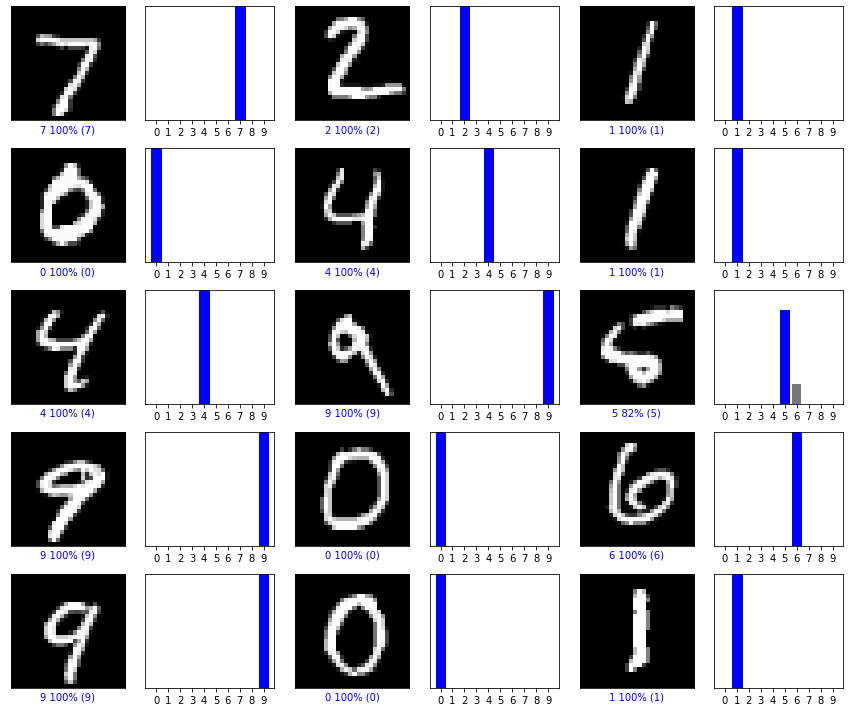

In [ ]:
plot_predicted(predictions)

### 2) 모델 2

In [ ]:
predictions_2_before_training = model_2_before_training.predict(x_test)

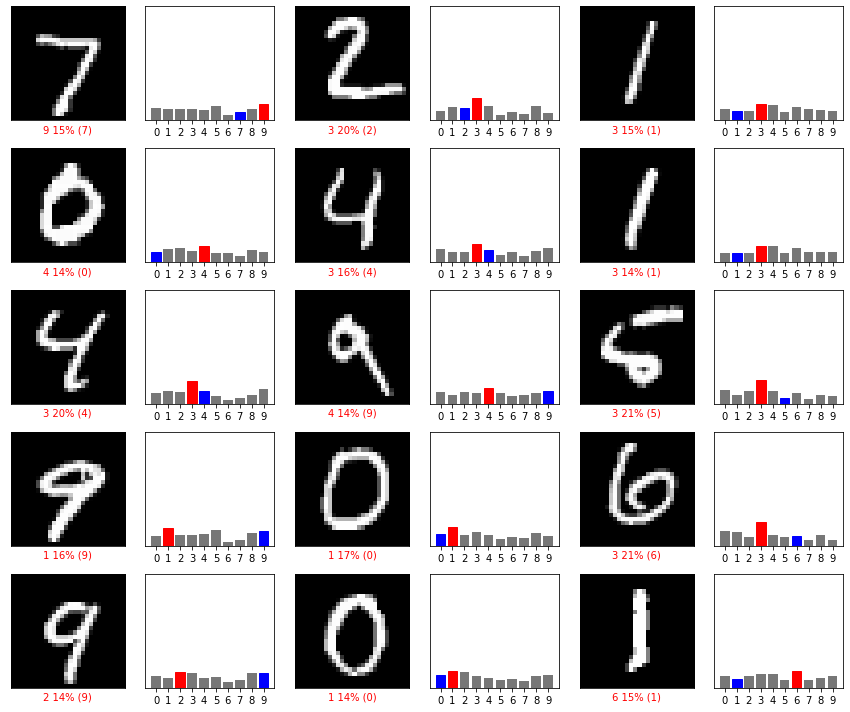

In [ ]:
plot_predicted(predictions_2_before_training)

In [ ]:
predictions_2 = model_2.predict(x_test)

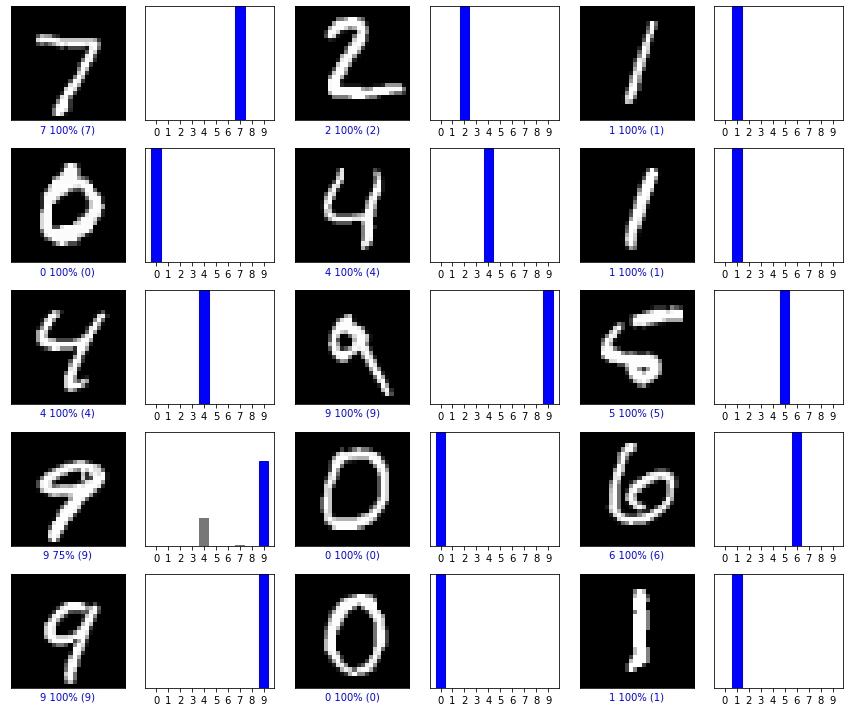

In [ ]:
plot_predicted(predictions_2)

### 3) 모델 3

In [ ]:
predictions_3 = model_3.predict(x_test)

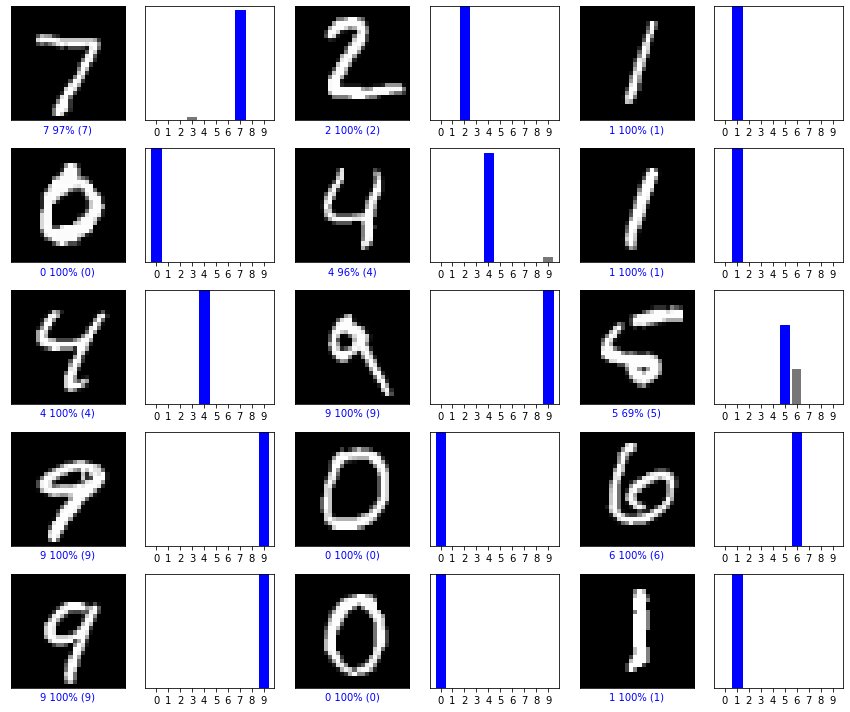

In [ ]:
plot_predicted(predictions_3)